## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---
## First, I'll compute the camera calibration using chessboard images

In [1]:
print("hola")

hola


In [28]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import pickle

In [23]:
import time
%matplotlib inline
time.sleep(1)

In [4]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

In [5]:
# Make a list of calibration images
images = glob.glob('../camera_cal/calibration*.jpg')

# Step through the list and search for chessboard corners
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
        cv2.imshow('img',img)
        cv2.waitKey(40)

cv2.destroyAllWindows()

## And so on and so forth...

In [6]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

In [25]:
img = cv2.imread("camera_cal/calibration2.jpg")
cv2.imshow('img',img)

In [11]:
cv2.imshow('img',dst)

In [32]:
import pickle
pickle.dump( [mtx,dist,rvecs,tvecs], open( 'cam_cal.pkl', 'wb' ))

In [37]:
[mtx2, dist2, rvecs2, tvecs2] = pickle.load(open( "cam_cal.pkl", "rb" ))

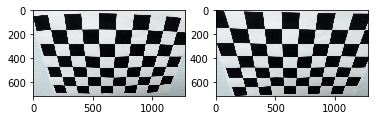

In [26]:
jj, axes= plt.subplots(1,2)
axes[0].imshow(img)
axes[1].imshow(dst)

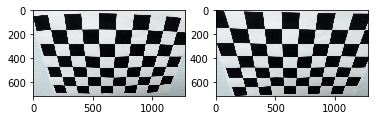

In [38]:
dst = cv2.undistort(img, mtx2, dist2, None, mtx2)
jj, axes= plt.subplots(1,2)
axes[0].imshow(img)
axes[1].imshow(dst)